In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

In [2]:
# Cargar el dataset de diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # 'target' es la variable dependiente

# Seleccionar múltiples variables independientes
X = df[['bmi', 'age', 'bp']]  # Índice de masa corporal, edad, presión arterial promedio
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados de la Regresión Lineal Múltiple (con BMI, Age y BP como predictores):")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")
print(f"Intercepto (beta_0): {model.intercept_:.2f}")
print("Pendientes (beta_i):")
for i, col in enumerate(X.columns):
    print(f"  {col}: {model.coef_[i]:.2f}")



Resultados de la Regresión Lineal Múltiple (con BMI, Age y BP como predictores):
Error Cuadrático Medio (MSE): 3756.84
Coeficiente de Determinación (R^2): 0.29
Intercepto (beta_0): 151.77
Pendientes (beta_i):
  bmi: 836.11
  age: 48.40
  bp: 380.21


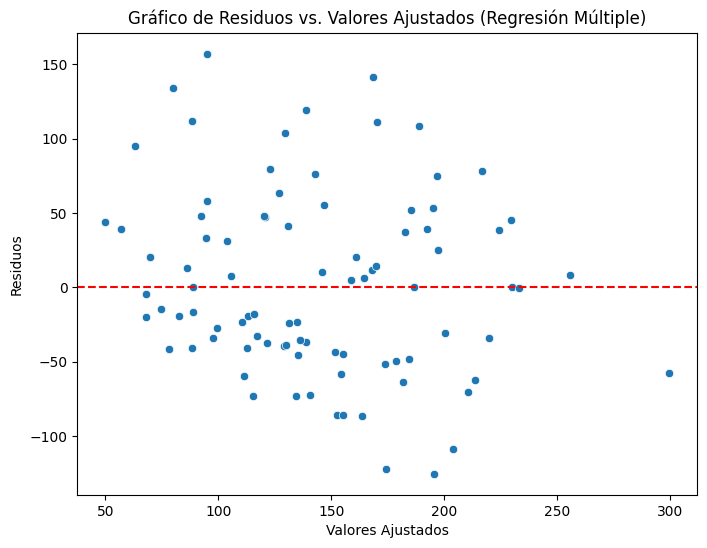

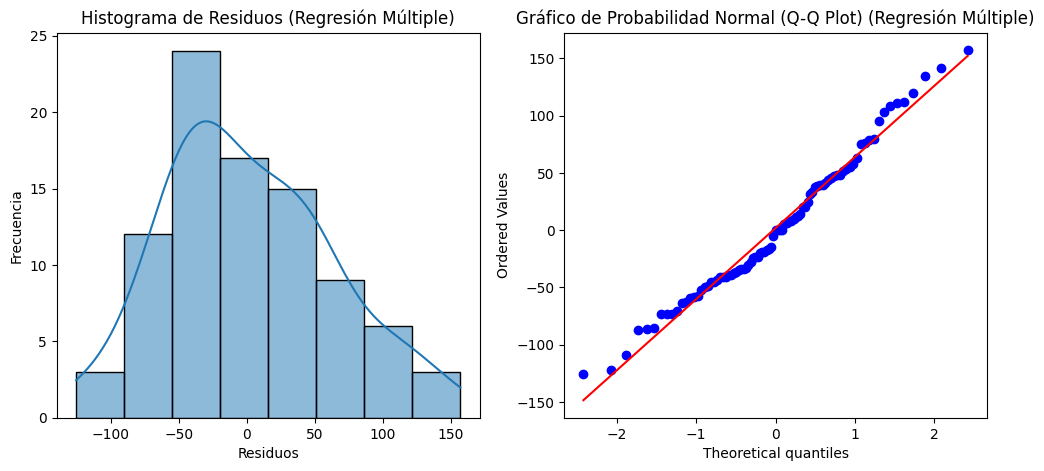


Resumen del modelo de Regresión Lineal Múltiple con statsmodels:
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     83.16
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.30e-40
Time:                        10:48:25   Log-Likelihood:                -1943.4
No. Observations:                 353   AIC:                             3895.
Df Residuals:                     349   BIC:                             3910.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [4]:
# Comprobación de algunos supuestos (visualización de residuos vs. valores ajustados)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuos vs. Valores Ajustados (Regresión Múltiple)')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

# Comprobación de normalidad de los residuos (Histograma y Q-Q plot)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histograma de Residuos (Regresión Múltiple)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
stats.probplot(residuals, plot=plt)
plt.title('Gráfico de Probabilidad Normal (Q-Q Plot) (Regresión Múltiple)')
plt.show()

# Resumen completo del modelo con statsmodels
X_train_sm = sm.add_constant(X_train) # Agregar una constante para el intercepto
model_sm = sm.OLS(y_train, X_train_sm).fit()
print("\nResumen del modelo de Regresión Lineal Múltiple con statsmodels:")
print(model_sm.summary())